<pre><b>Name         :  Chaitanya Machhindra Nawale
Roll No.     :  BECOB215
Assignment   :  Linear Regression<b></pre>

In [ ]:
#data 
x = [10,9,2,15,10,16,11,16]
y = [95,80,10,50,45,98,38,93]


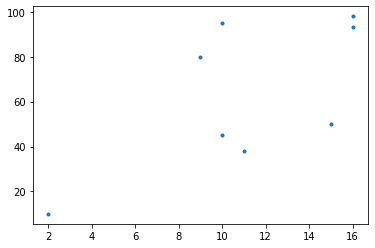

In [ ]:
#plot distribution
import matplotlib.pyplot as plt
plt.plot(x,y,'.')

In [ ]:
def estimate_coefficients(x,y):
    import numpy as np
    #number of observations
    N = np.size(x)
    
    #calculate mean for both x and y
    mean_x,mean_y = np.mean(x) , np.mean(y)
    
    #calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - N * mean_y * mean_x
    SS_xx = np.sum(x*x) - N * mean_x * mean_x
    
    #calulating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1 * mean_x
    
    return (b_0,b_1)

In [ ]:
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

Estimated coefficients:
b_0 = 12.584627964022893 b_1 = 4.58789860997547


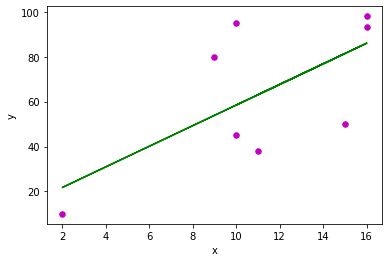

In [ ]:
import numpy as np
x = np.array([10,9,2,15,10,16,11,16])
y=np.array([95,80,10,50,45,98,38,93])

# estimating coefficients 
b = estimate_coefficients(x, y) 
print("Estimated coefficients:\nb_0 = {} b_1 = {}".format(b[0], b[1])) 
  
# plotting regression line 
plot_regression_line(x, y, b) 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)
 
# input
X = boston_pd.iloc[:, :-1]
 
#output
Y = boston_pd.iloc[:, -1]
 
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  House Price
0  0.00632  18.0   2.31   0.0  ...     15.3  396.90   4.98         24.0
1  0.02731   0.0   7.07   0.0  ...     17.8  396.90   9.14         21.6
2  0.02729   0.0   7.07   0.0  ...     17.8  392.83   4.03         34.7
3  0.03237   0.0   2.18   0.0  ...     18.7  394.63   2.94         33.4
4  0.06905   0.0   2.18   0.0  ...     18.7  396.90   5.33         36.2

[5 rows x 14 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
    test_size = 0.25)
 
print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [ ]:

# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
 
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  28.079375854493122
    Columns  Coefficient Estimate
0      CRIM             -0.087599
1        ZN              0.050808
2     INDUS              0.035277
3      CHAS              2.707916
4       NOX            -16.834322
5        RM              4.242470
6       AGE              0.000304
7       DIS             -1.394424
8       RAD              0.246382
9       TAX             -0.010339
10  PTRATIO             -0.972590
11        B              0.012189
12    LSTAT             -0.471774


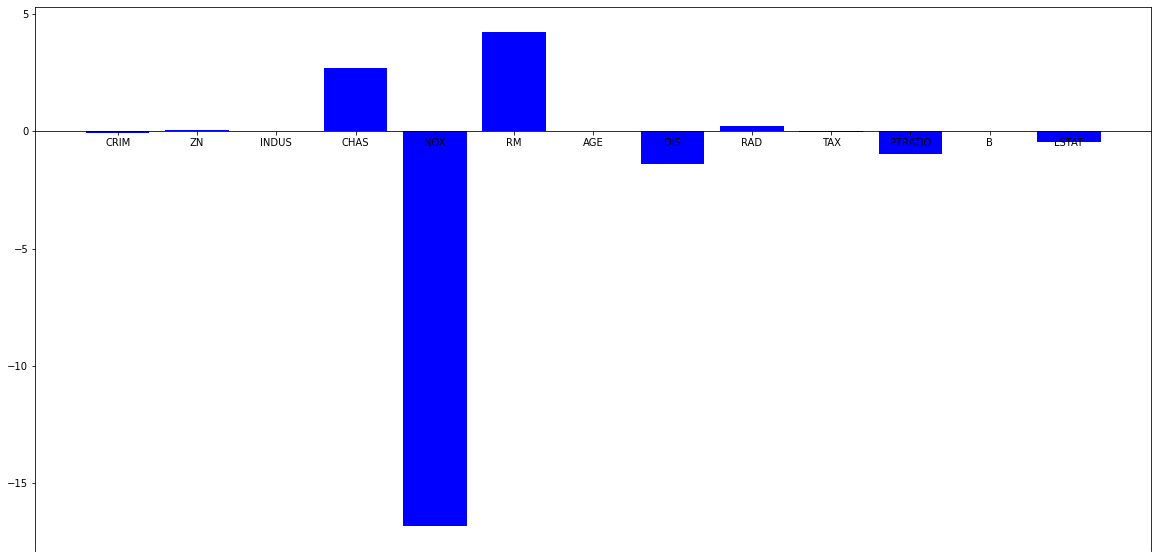

In [ ]:

# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = 'blue')
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

In [ ]:
#Ridge regression
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)
 
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

28.443487391371548
    Columns  Coefficient Estimate
0      CRIM             -0.082356
1        ZN              0.051347
2     INDUS              0.004874
3      CHAS              2.521705
4       NOX             -8.942521
5        RM              4.290056
6       AGE             -0.006838
7       DIS             -1.276036
8       RAD              0.224309
9       TAX             -0.010907
10  PTRATIO             -0.889252
11        B              0.012539
12    LSTAT             -0.482607


In [ ]:
#Lasso Regression
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Mean squared error on test set 31.70201662597946
    Columns  Coefficient Estimate
0      CRIM             -0.053518
1        ZN              0.054940
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.111800
6       AGE              0.026952
7       DIS             -0.637336
8       RAD              0.199252
9       TAX             -0.011477
10  PTRATIO             -0.771348
11        B              0.009908
12    LSTAT             -0.753869


In [ ]:
#Lasso Regression
from sklearn.linear_model import ElasticNet
 
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)
 
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 31.436358242371625


,Columns,Coefficient Estimate
0,CRIM,-0.068441
1,ZN,0.060964
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.986787
6,AGE,0.026864
7,DIS,-0.735480
8,RAD,0.242975
9,TAX,-0.013268
